# Explore here

In [7]:
# Your code here

DATA COLLECTION

- DATA FROM: https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv


In [8]:
import os
import pandas as pd
import csv
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)

os.makedirs("/workspaces/logistic-regresion/data/raw", exist_ok = True)
file_path = os.path.join("/workspaces/logistic-regresion/data/raw", "bank-marketing-campaign-data.csv")

train_data.to_csv(file_path, index=False)

train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
12556,40,blue-collar,married,basic.9y,unknown,yes,no,telephone,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
35451,31,admin.,married,university.degree,no,no,no,cellular,may,mon,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
30592,59,retired,married,basic.4y,no,no,no,cellular,may,mon,...,6,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
17914,43,housemaid,divorced,basic.9y,no,yes,no,cellular,jul,tue,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
3315,39,admin.,single,high.school,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


- age: Age of customer (numeric)
- job: Type of job (categorical)
- marital: Marital status (categorical)
- education: Level of education (categorical)
- default: Do you currently have credit (categorical)
- housing: Do you have a housing loan (categorical)
- loan: Do you have a personal loan? (categorical)
- contact: Type of contact communication (categorical)
- month: Last month in which you have been contacted (categorical)
- day_of_week: Last day on which you have been contacted (categorical)
- duration: Duration of previous contact in seconds (numeric)
- campaign: Number of contacts made during this campaign to the customer (numeric)
- pdays: Number of days that elapsed since the last campaign until the customer was contacted (numeric)
- previous: Number of contacts made during the previous campaign to the customer (numeric)
- poutcome: Result of the previous marketing campaign (categorical)
- emp.var.rate: Employment variation rate. Quarterly indicator (numeric)
- cons.price.idx: Consumer price index. Monthly indicator (numeric)
- cons.conf.idx: Consumer confidence index. Monthly indicator (numeric)
- euribor3m: EURIBOR 3-month rate. Daily indicator (numeric)
- nr.employed: Number of employees. Quarterly indicator (numeric)
- y: TARGET. Whether the customer takes out a long-term deposit or not (categorical)

In [9]:
train_data.shape

(32950, 21)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32950 entries, 12556 to 15795
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  object 
 2   marital         32950 non-null  object 
 3   education       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     32950 non-null  object 
 10  duration        32950 non-null  int64  
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null  

In [11]:
train_data["job"].value_counts()

job
admin.           8328
blue-collar      7439
technician       5352
services         3212
management       2310
retired          1363
self-employed    1153
entrepreneur     1145
housemaid         867
unemployed        798
student           721
unknown           262
Name: count, dtype: int64

The dataset has 41188 rows and 21 columns. There's no NaN data so we'll check for duplicates, handle them and proceed to remove irrelevant columns and data.

In [12]:
train_data.duplicated().sum()

np.int64(9)

In [13]:
train_data[train_data.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
38281,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
38255,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [14]:
train_data = train_data.drop_duplicates()
train_data.reset_index(drop=True, inplace=True)
train_data.duplicated().sum()

np.int64(0)

In [15]:
train_data.nunique()

age                 77
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1472
campaign            41
pdays               26
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          313
nr.employed         11
y                    2
dtype: int64

In [16]:
train_data["poutcome"].value_counts(normalize=True) * 100

poutcome
nonexistent    86.299748
failure        10.391306
success         3.308946
Name: proportion, dtype: float64

In [17]:
train_data["default"].value_counts(normalize=True) * 100

default
no         79.174888
unknown    20.816004
yes         0.009107
Name: proportion, dtype: float64

In [18]:
train_data["previous"].value_counts(normalize=True) * 100

previous
0    86.299748
1    11.128988
2     1.815367
3     0.549467
4     0.151787
5     0.042500
6     0.009107
7     0.003036
Name: proportion, dtype: float64

In [19]:
train_data["pdays"].value_counts(normalize=True) * 100

pdays
999    96.348016
3       1.056434
6       1.010898
4       0.282323
12      0.151787
7       0.142679
9       0.142679
2       0.139644
10      0.124465
5       0.112322
13      0.075893
11      0.072858
1       0.066786
15      0.060715
14      0.045536
8       0.045536
0       0.036429
16      0.024286
17      0.021250
18      0.015179
19      0.006071
22      0.006071
21      0.003036
27      0.003036
20      0.003036
25      0.003036
Name: proportion, dtype: float64

In [20]:
train_data["campaign"].value_counts(normalize=True) * 100

campaign
1     42.800765
2     25.551744
3     13.062749
4      6.493428
5      3.828056
6      2.364834
7      1.499651
8      0.992684
9      0.722504
10     0.543396
11     0.443217
12     0.324823
13     0.218573
14     0.157858
17     0.148751
16     0.127501
15     0.121429
18     0.078929
19     0.066786
20     0.066786
21     0.063750
23     0.042500
24     0.042500
22     0.036429
27     0.024286
29     0.024286
25     0.021250
26     0.021250
30     0.018214
35     0.015179
31     0.015179
28     0.009107
33     0.009107
34     0.009107
32     0.009107
43     0.006071
40     0.006071
56     0.003036
41     0.003036
39     0.003036
37     0.003036
Name: proportion, dtype: float64

COLUMNS TO DROP.

- poutcome -> nonexistent is too high to benefit the data.
- default -> non informative, 'yes' value is very rare
- day_of_week
- previous
- pdays -> most values are 999 which means the customer wasn't contacted

In [21]:
train_data.drop(columns=["poutcome", "default", "day_of_week", "previous", "pdays"], axis = 1, inplace = True)
train_data[:10]

,age,job,marital,education,housing,loan,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,blue-collar,married,basic.9y,yes,no,telephone,jul,94,2,1.4,93.918,-42.7,4.960,5228.1,no
1,31,admin.,married,university.degree,no,no,cellular,may,116,4,-1.8,92.893,-46.2,1.244,5099.1,no
2,59,retired,married,basic.4y,no,no,cellular,may,13,6,-1.8,92.893,-46.2,1.354,5099.1,no
3,43,housemaid,divorced,basic.9y,yes,no,cellular,jul,94,5,1.4,93.918,-42.7,4.961,5228.1,no
4,39,admin.,single,high.school,no,no,telephone,may,344,2,1.1,93.994,-36.4,4.860,5191.0,no
5,33,management,married,basic.9y,no,no,cellular,apr,727,2,-1.8,93.075,-47.1,1.405,5099.1,no
6,35,admin.,married,professional.course,yes,no,cellular,may,115,3,-1.8,92.893,-46.2,1.354,5099.1,no
7,36,blue-collar,single,basic.9y,no,no,telephone,may,201,2,1.1,93.994,-36.4,4.857,5191.0,no
8,36,blue-collar,married,basic.9y,yes,no,telephone,may,93,2,1.1,93.994,-36.4,4.857,5191.0,no
9,28,technician,single,university.degree,yes,no,cellular,jul,174,7,1.4,93.918,-42.7,4.962,5228.1,no


In [22]:
train_data.duplicated().sum()
train_data[train_data.duplicated(keep=False)]

,age,job,marital,education,housing,loan,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20358,56,blue-collar,married,basic.4y,no,no,telephone,may,136,1,1.1,93.994,-36.4,4.857,5191.0,no
21205,45,blue-collar,married,basic.9y,no,no,telephone,may,121,1,1.1,93.994,-36.4,4.856,5191.0,no
23194,56,blue-collar,married,basic.4y,no,no,telephone,may,136,1,1.1,93.994,-36.4,4.857,5191.0,no
26741,45,blue-collar,married,basic.9y,no,no,telephone,may,121,1,1.1,93.994,-36.4,4.856,5191.0,no


Found more duplicates after removing columns so we'll eliminate them.

In [23]:
train_data = train_data.drop_duplicates()

VARIABLE ANALYSIS

Categorical.

- job
- marital
- education
- housing
- loan
- contact
- month
- y

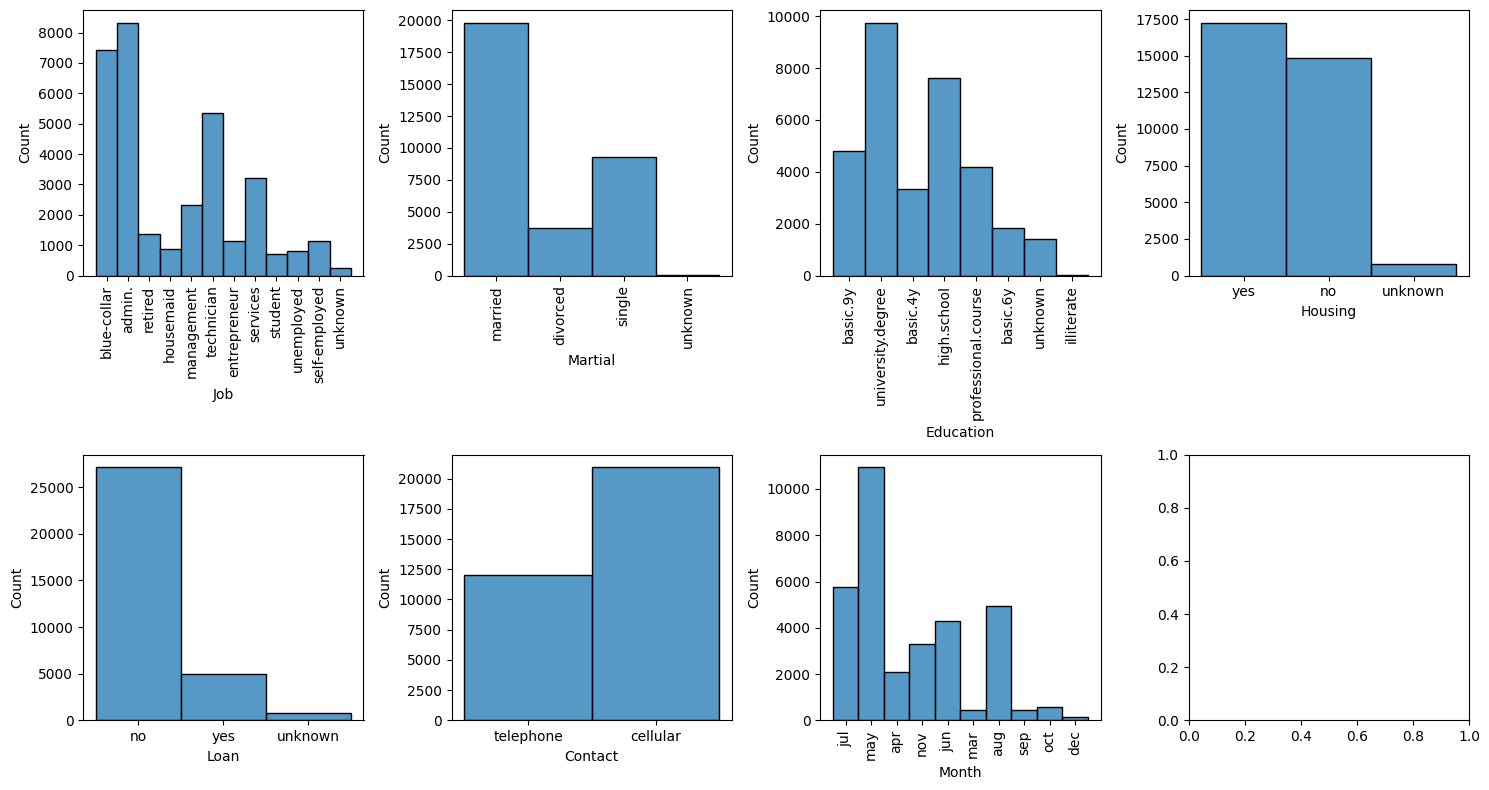

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 4, figsize = (15, 8))

sns.histplot(ax = axis[0,0], data = train_data, x = "job").set(xlabel = "Job")
sns.histplot(ax = axis[0,1], data = train_data, x = "marital").set(xlabel = "Martial")
sns.histplot(ax = axis[0,2], data = train_data, x = "education").set(xlabel = "Education")
sns.histplot(ax = axis[0,3], data = train_data, x = "housing").set(xlabel = "Housing")
sns.histplot(ax = axis[1,0], data = train_data, x = "loan").set(xlabel = "Loan")
sns.histplot(ax = axis[1,1], data = train_data, x = "contact").set(xlabel = "Contact")
sns.histplot(ax = axis[1,2], data = train_data, x = "month").set(xlabel = "Month")

axis[0, 0].tick_params(axis="x", rotation=90)
axis[0, 1].tick_params(axis="x", rotation=90)
axis[0, 2].tick_params(axis="x", rotation=90)
axis[1, 2].tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()

There are unknown values, so we'll remove them.

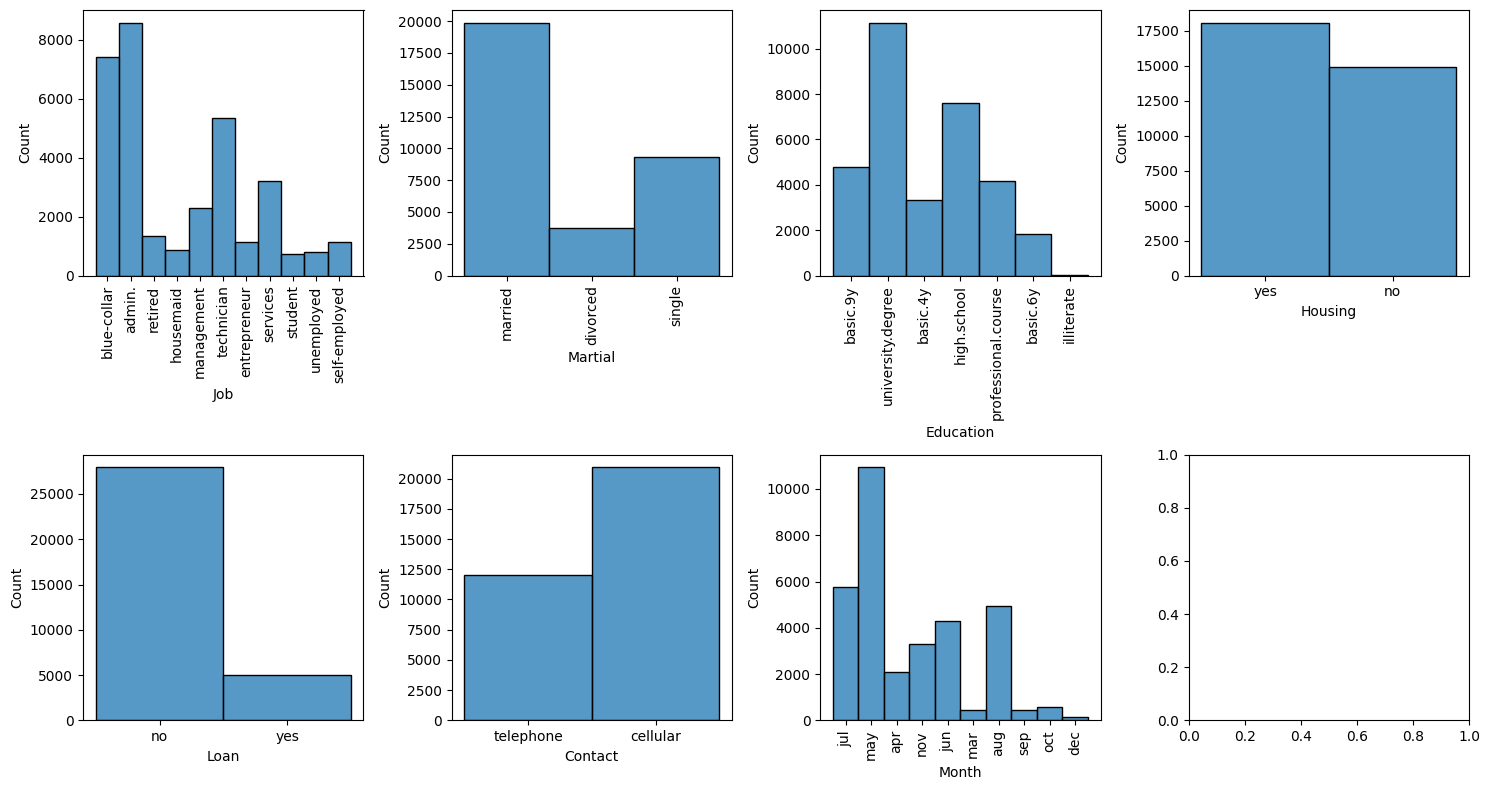

In [25]:
for col in ["job", "marital", "education", "housing", "loan"]:
    train_data[col] = train_data[col].replace('unknown', train_data[col].mode()[0])

fig, axis = plt.subplots(2, 4, figsize = (15, 8))

sns.histplot(ax = axis[0,0], data = train_data, x = "job").set(xlabel = "Job")
sns.histplot(ax = axis[0,1], data = train_data, x = "marital").set(xlabel = "Martial")
sns.histplot(ax = axis[0,2], data = train_data, x = "education").set(xlabel = "Education")
sns.histplot(ax = axis[0,3], data = train_data, x = "housing").set(xlabel = "Housing")
sns.histplot(ax = axis[1,0], data = train_data, x = "loan").set(xlabel = "Loan")
sns.histplot(ax = axis[1,1], data = train_data, x = "contact").set(xlabel = "Contact")
sns.histplot(ax = axis[1,2], data = train_data, x = "month").set(xlabel = "Month")

axis[0, 0].tick_params(axis="x", rotation=90)
axis[0, 1].tick_params(axis="x", rotation=90)
axis[0, 2].tick_params(axis="x", rotation=90)
axis[1, 2].tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()

Numerical.

- duration
- campaign
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed

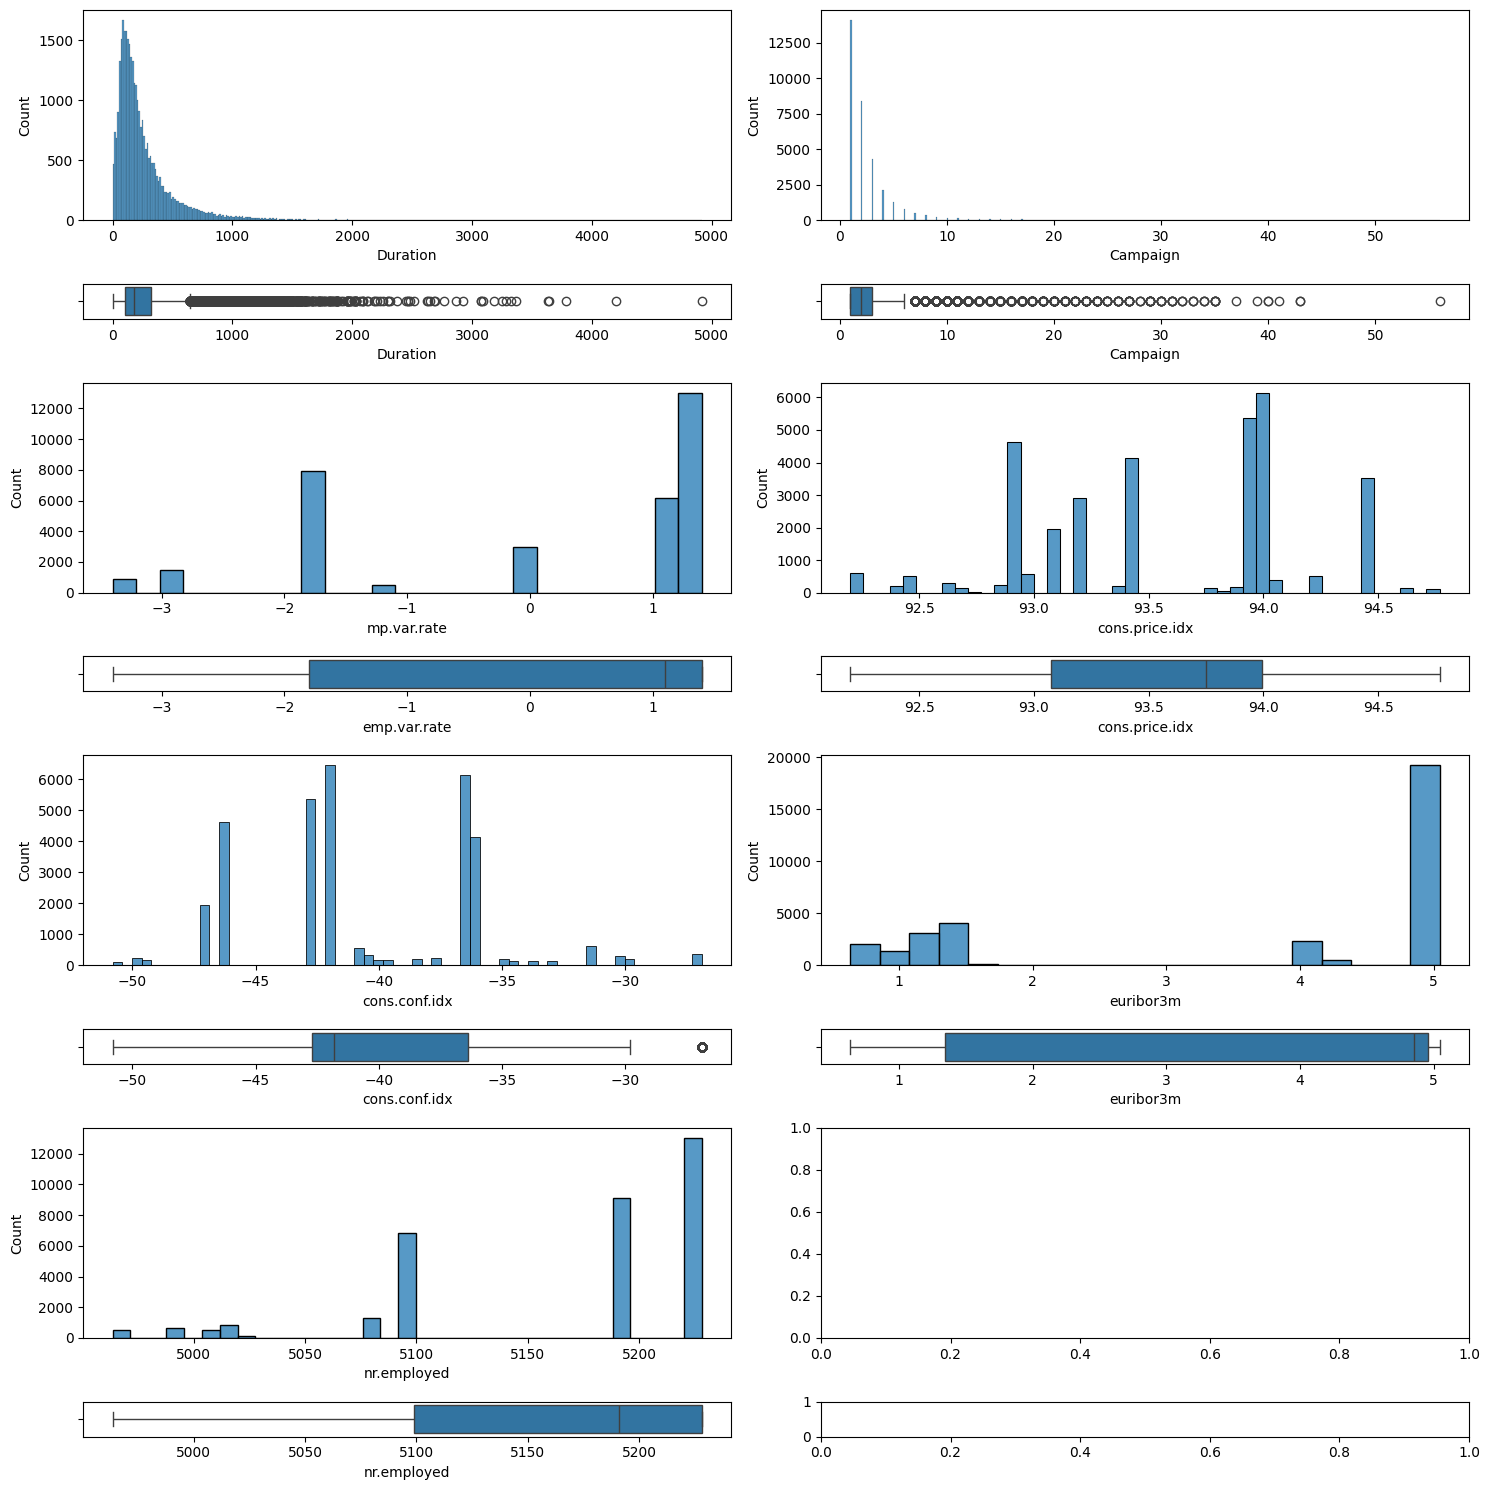

In [26]:
fig, axis = plt.subplots(8, 2, figsize = (15, 15), gridspec_kw={"height_ratios": [6, 1] * 4})

sns.histplot(ax = axis[0,0], data = train_data, x = "duration").set(xlabel = "Duration")
sns.boxplot(ax = axis[1,0], data = train_data, x = "duration").set(xlabel = "Duration")

sns.histplot(ax = axis[0,1], data = train_data, x = "campaign").set(xlabel = "Campaign")
sns.boxplot(ax = axis[1,1], data = train_data, x = "campaign").set(xlabel = "Campaign")

sns.histplot(ax = axis[2,0], data = train_data, x = "emp.var.rate").set(xlabel = "mp.var.rate")
sns.boxplot(ax = axis[3,0], data = train_data, x = "emp.var.rate").set(xlabel = "emp.var.rate")

sns.histplot(ax = axis[2,1], data = train_data, x = "cons.price.idx").set(xlabel = "cons.price.idx")
sns.boxplot(ax = axis[3,1], data = train_data, x = "cons.price.idx").set(xlabel = "cons.price.idx")

sns.histplot(ax = axis[4,0], data = train_data, x = "cons.conf.idx").set(xlabel = "cons.conf.idx")
sns.boxplot(ax = axis[5,0], data = train_data, x = "cons.conf.idx").set(xlabel = "cons.conf.idx")

sns.histplot(ax = axis[4,1], data = train_data, x = "euribor3m").set(xlabel = "euribor3m")
sns.boxplot(ax = axis[5,1], data = train_data, x = "euribor3m").set(xlabel = "euribor3m")

sns.histplot(ax = axis[6,0], data = train_data, x = "nr.employed").set(xlabel = "nr.employed")
sns.boxplot(ax = axis[7,0], data = train_data, x = "nr.employed").set(xlabel = "nr.employed")

plt.tight_layout()
plt.show()

FACTORIZING DATA

In [27]:
heatmap_df = train_data.copy()

from sklearn.preprocessing import LabelEncoder

label_cols = ["job", "marital", "education", "housing", "loan", "contact", "month", "y"]
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    heatmap_df[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le

heatmap_df[:10]

,age,job,marital,education,housing,loan,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,1,1,2,1,0,1,3,94,2,1.4,93.918,-42.7,4.960,5228.1,0
1,31,0,1,6,0,0,0,6,116,4,-1.8,92.893,-46.2,1.244,5099.1,0
2,59,5,1,0,0,0,0,6,13,6,-1.8,92.893,-46.2,1.354,5099.1,0
3,43,3,0,2,1,0,0,3,94,5,1.4,93.918,-42.7,4.961,5228.1,0
4,39,0,2,3,0,0,1,6,344,2,1.1,93.994,-36.4,4.860,5191.0,0
5,33,4,1,2,0,0,0,0,727,2,-1.8,93.075,-47.1,1.405,5099.1,0
6,35,0,1,5,1,0,0,6,115,3,-1.8,92.893,-46.2,1.354,5099.1,0
7,36,1,2,2,0,0,1,6,201,2,1.1,93.994,-36.4,4.857,5191.0,0
8,36,1,1,2,1,0,1,6,93,2,1.1,93.994,-36.4,4.857,5191.0,0
9,28,9,2,6,1,0,0,3,174,7,1.4,93.918,-42.7,4.962,5228.1,0


HEATMAP

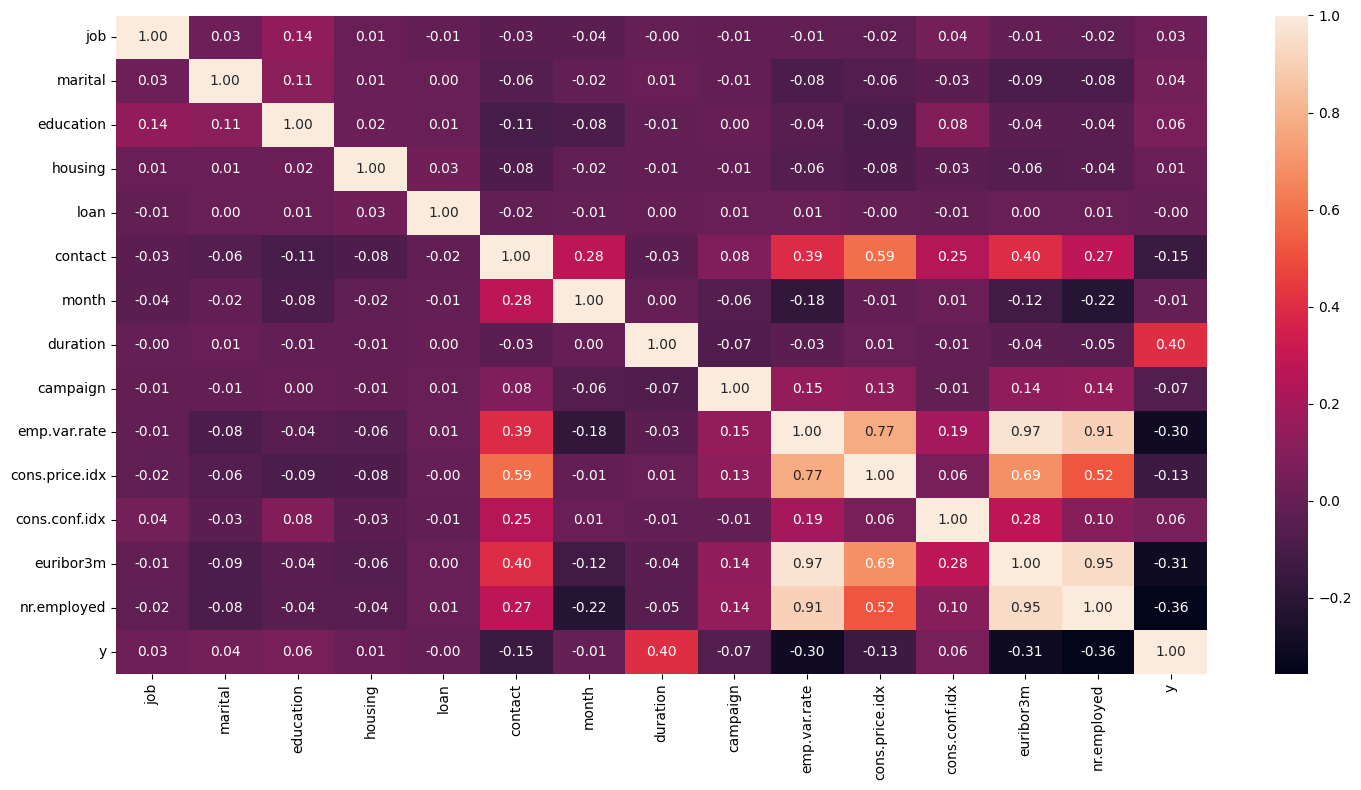

In [28]:
fig, axes = plt.subplots(figsize = (15, 8))

sns.heatmap(heatmap_df[["job", "marital", "education", "housing", "loan", "contact", "month", "duration", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

job, marital, education, housing and campaign have very low correlation with the taget, y, so we'll remove them from the dataframe.

In [29]:
train_data.drop(columns=["job", "marital", "education", "housing", "campaign"], axis = 1, inplace = True)
heatmap_df.drop(columns=["job", "marital", "education", "housing", "campaign"], axis = 1, inplace = True)
heatmap_df[:10]

,age,loan,contact,month,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,0,1,3,94,1.4,93.918,-42.7,4.960,5228.1,0
1,31,0,0,6,116,-1.8,92.893,-46.2,1.244,5099.1,0
2,59,0,0,6,13,-1.8,92.893,-46.2,1.354,5099.1,0
3,43,0,0,3,94,1.4,93.918,-42.7,4.961,5228.1,0
4,39,0,1,6,344,1.1,93.994,-36.4,4.860,5191.0,0
5,33,0,0,0,727,-1.8,93.075,-47.1,1.405,5099.1,0
6,35,0,0,6,115,-1.8,92.893,-46.2,1.354,5099.1,0
7,36,0,1,6,201,1.1,93.994,-36.4,4.857,5191.0,0
8,36,0,1,6,93,1.1,93.994,-36.4,4.857,5191.0,0
9,28,0,0,3,174,1.4,93.918,-42.7,4.962,5228.1,0


In [30]:
heatmap_df.describe()

,age,loan,contact,month,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000
mean,40.016910,0.151917,0.364735,4.231853,257.788215,0.082981,93.576821,-40.514985,3.622520,5167.088345,0.112481
std,10.434968,0.358946,0.481363,2.317701,259.490111,1.570007,0.579183,4.622403,1.733788,72.356605,0.315962
min,17.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,0.000000,0.000000,3.000000,102.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,0.000000,0.000000,4.000000,179.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,0.000000,1.000000,6.000000,318.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,1.000000,1.000000,9.000000,4918.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Posible outliers:
- age
- duration

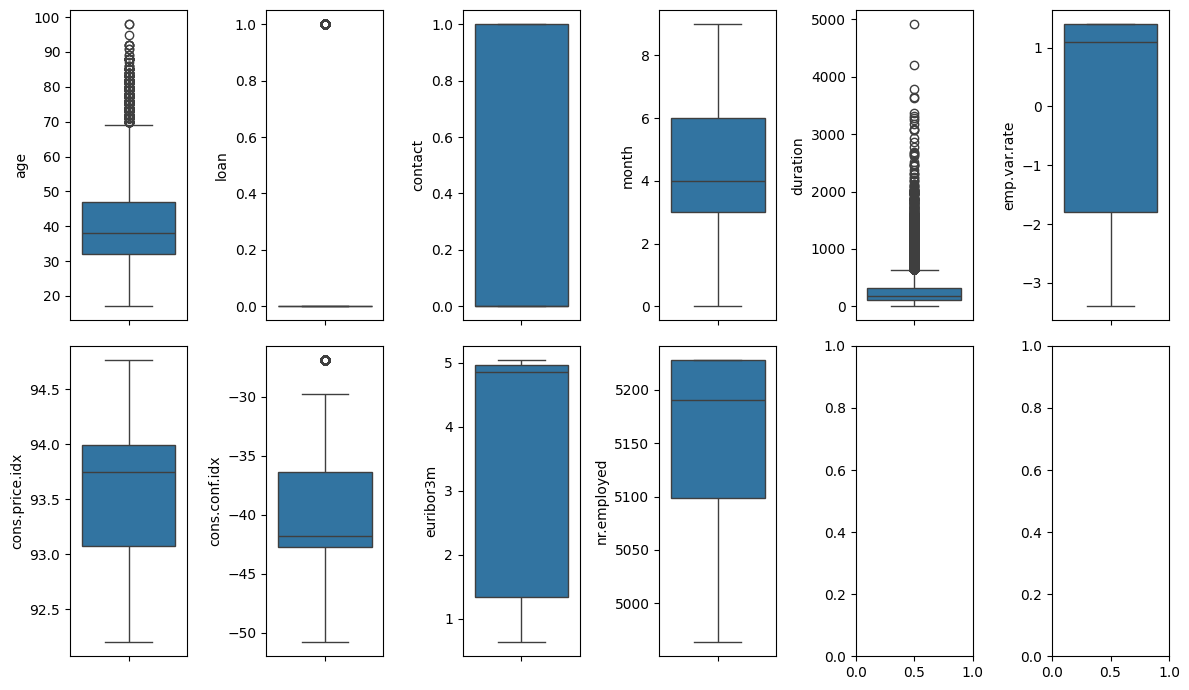

In [31]:
fig, axis = plt.subplots(2, 6, figsize = (12, 7))

sns.boxplot(ax = axis[0, 0], data = heatmap_df, y = "age")
sns.boxplot(ax = axis[0, 1], data = heatmap_df, y = "loan")
sns.boxplot(ax = axis[0, 2], data = heatmap_df, y = "contact")
sns.boxplot(ax = axis[0, 3], data = heatmap_df, y = "month")
sns.boxplot(ax = axis[0, 4], data = heatmap_df, y = "duration")
sns.boxplot(ax = axis[0, 5], data = heatmap_df, y = "emp.var.rate")
sns.boxplot(ax = axis[1, 0], data = heatmap_df, y = "cons.price.idx")
sns.boxplot(ax = axis[1, 1], data = heatmap_df, y = "cons.conf.idx")
sns.boxplot(ax = axis[1, 2], data = heatmap_df, y = "euribor3m")
sns.boxplot(ax = axis[1, 3], data = heatmap_df, y = "nr.employed")

plt.tight_layout()

plt.show()

In [32]:
age_stats = heatmap_df["age"].describe()
age_stats

count    32939.000000
mean        40.016910
std         10.434968
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [33]:
#
#       AGE
#
age_iqr = age_stats["75%"] - age_stats["25%"]

age_upper_limit = age_stats["75%"] + 1.5 * age_iqr
age_lower_limit = age_stats["25%"] - 1.5 * age_iqr

print(f'Price upper limit: {round(age_upper_limit, 2)}')
print(f'Price lower limit: {round(age_lower_limit, 2)} \n')

Price upper limit: 69.5
Price lower limit: 9.5 



In [34]:
duration_stats = heatmap_df["duration"].describe()
duration_stats

count    32939.000000
mean       257.788215
std        259.490111
min          0.000000
25%        102.000000
50%        179.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64

In [35]:
#
#       DURATION
#
duration_iqr = duration_stats["75%"] - duration_stats["25%"]

duration_upper_limit = duration_stats["75%"] + 1.5 * duration_iqr
duration_lower_limit = duration_stats["25%"] - 1.5 * duration_iqr

print(f'Price upper limit: {round(duration_upper_limit, 2)}')
print(f'Price lower limit: {round(duration_lower_limit, 2)} \n')

Price upper limit: 642.0
Price lower limit: -222.0 



In [36]:

#
#       AGE
#
heatmap_df['age'] = heatmap_df['age'].apply(
    lambda x: min(x, age_upper_limit) if x > age_upper_limit else x
)

#
#       DURATION
#
heatmap_df['duration'] = heatmap_df['duration'].apply(
    lambda x: min(x, duration_upper_limit) if x > duration_upper_limit else x
)

In [37]:
heatmap_df.describe()

,age,loan,contact,month,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000,32939.000000
mean,39.931722,0.151917,0.364735,4.231853,234.345396,0.082981,93.576821,-40.514985,3.622520,5167.088345,0.112481
std,10.141531,0.358946,0.481363,2.317701,176.628687,1.570007,0.579183,4.622403,1.733788,72.356605,0.315962
min,17.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,0.000000,0.000000,3.000000,102.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,0.000000,0.000000,4.000000,179.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,0.000000,1.000000,6.000000,318.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,69.500000,1.000000,1.000000,9.000000,642.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


FEATURE SCALING

In [38]:
from sklearn.model_selection import train_test_split

min_max_df = heatmap_df.copy()

num_variables = ["age", "loan", "contact", "month", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]

X = min_max_df[num_variables].drop("y", axis = 1)
y = min_max_df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train)

,age,loan,contact,month,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
27126,36.0,0,0,1,111.0,1.4,93.444,-36.1,4.968,5228.1
19892,38.0,0,0,1,296.0,1.4,93.444,-36.1,4.963,5228.1
2375,52.0,1,1,6,140.0,1.1,93.994,-36.4,4.864,5191.0
8838,32.0,1,0,7,74.0,-0.1,93.200,-42.0,4.076,5195.8
5440,44.0,0,1,6,228.0,1.1,93.994,-36.4,4.856,5191.0
...,...,...,...,...,...,...,...,...,...,...
16850,33.0,0,1,6,95.0,1.1,93.994,-36.4,4.859,5191.0
6265,43.0,1,1,4,304.0,1.4,94.465,-41.8,4.967,5228.1
11284,29.0,0,1,4,255.0,1.4,94.465,-41.8,4.961,5228.1
860,25.0,0,0,6,121.0,-1.8,92.893,-46.2,1.250,5099.1


FEATURE SELECTION 

In [39]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k=5)

X_selected = selection_model.fit_transform(X_train, y_train)
X_test_selected = selection_model.transform(X_test)


MIN-MAX SCALING

In [40]:

#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

X_test_scaled.head()

,age,loan,contact,month,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1487,-1.277110,2.370133,-0.757964,0.765200,-1.239114,-1.199196,-1.178460,-1.228318,-1.344494,-0.941311
28483,0.891954,-0.421917,1.319323,0.765200,0.442636,0.646298,0.719618,0.888871,0.711883,0.329209
32554,0.398985,2.370133,-0.757964,0.765200,-0.808768,-1.199196,-1.178460,-1.228318,-1.358907,-0.941311
843,0.004610,-0.421917,1.319323,-0.098845,-0.621906,0.837212,1.531602,-0.277744,0.769533,0.842117
31328,-0.981329,2.370133,-0.757964,1.197223,-0.219872,-0.117355,-0.649204,-0.320952,0.261059,0.395569


In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

#max_iter=500, solver='liblinear', class_weight='balanced', random_state=42

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42,
                   solver='liblinear')

In [42]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(6588,))

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5788
           1       0.43      0.90      0.58       800

    accuracy                           0.84      6588
   macro avg       0.70      0.86      0.74      6588
weighted avg       0.92      0.84      0.86      6588



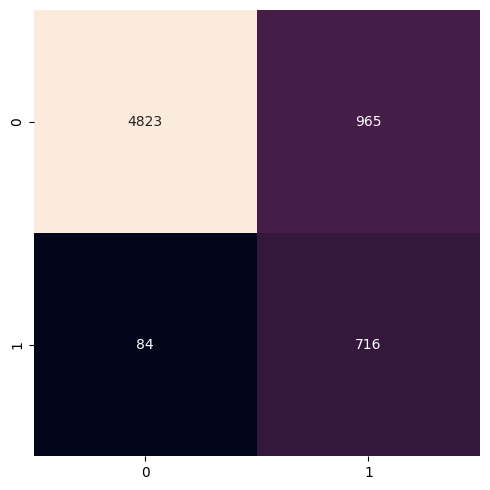

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(model_cm)

plt.figure(figsize = (5, 5))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
#grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid = GridSearchCV(LogisticRegression(random_state=42, class_weight="balanced"), hyperparams, scoring='f1', cv=5, verbose=0)

grid

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                          random_state=42, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [48]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

/home/vscode/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode

Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'sag'}


In [49]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [52]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8943533697632058